# Exploratory Data Analysis (EDA)

In [1]:
# Simulating Dataset: Customer Transactions Dataset

import pandas as pd
import numpy as np

np.random.seed(42) # helps in reproducing the same data everytime

n = 500

df = pd.DataFrame({
    'CustomerID': [f"C{i:04d}" for i in range(1, n+1)],
    'Age': np.random.randint(18, 70, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n),
    'Signup_Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Last_Purchase_Date': pd.date_range(start='2023-02-01', periods=n, freq='D'),
    'Annual_Income': np.random.normal(60000, 15000, n).astype(int),
    'Purchased_Product': np.random.choice(['Yes', 'No'], n, p=[0.4, 0.6]),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Grocery', 'Home'], n),
    'Spending_Score': np.random.randint(1, 100, n),
    'Churned': np.random.choice([0, 1], n, p=[0.8, 0.2])  # Target
})

df.head(10)


,CustomerID,Age,Gender,Region,Signup_Date,Last_Purchase_Date,Annual_Income,Purchased_Product,Product_Category,Spending_Score,Churned
0,C0001,56,Female,East,2023-01-01,2023-02-01,72347,Yes,Electronics,64,0
1,C0002,69,Male,North,2023-01-02,2023-02-02,61099,No,Grocery,33,0
2,C0003,46,Male,North,2023-01-03,2023-02-03,40650,No,Electronics,52,0
3,C0004,32,Female,North,2023-01-04,2023-02-04,40573,No,Grocery,89,0
4,C0005,60,Male,West,2023-01-05,2023-02-05,54963,No,Clothing,14,0
5,C0006,25,Male,South,2023-01-06,2023-02-06,85035,No,Grocery,75,1
6,C0007,38,Female,West,2023-01-07,2023-02-07,56106,No,Clothing,53,1
7,C0008,56,Male,North,2023-01-08,2023-02-08,37452,Yes,Clothing,99,0
8,C0009,36,Male,South,2023-01-09,2023-02-09,56313,No,Grocery,59,1
9,C0010,40,Male,North,2023-01-10,2023-02-10,55909,Yes,Electronics,78,0


**✅ Full EDA Steps Checklist:**

| Step | Topic                             |
| ---- | --------------------------------- |
| 1️⃣  | Basic structure overview          |
| 2️⃣  | Missing values                    |
| 3️⃣  | Duplicates                        |
| 4️⃣  | Data types                        |
| 5️⃣  | Descriptive statistics            |
| 6️⃣  | Outliers                          |
| 7️⃣  | Univariate analysis               |
| 8️⃣  | Bivariate (target vs feature)     |
| 9️⃣  | Multivariate interactions         |
| 🔟   | Correlation & heatmap             |
| 11️⃣ | Time analysis                     |
| 12️⃣ | Distribution skewness             |
| 13️⃣ | Categorical vs numerical analysis |
| 14️⃣ | Segmentation and grouping         |
| 15️⃣ | Business insights and hypotheses  |


##  1️⃣ Basic Structure Overview

In [7]:

df.head()



/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,CustomerID,Age,Gender,Region,Signup_Date,Last_Purchase_Date,Annual_Income,Purchased_Product,Product_Category,Spending_Score,Churned
0,C0001,56,Female,East,2023-01-01,2023-02-01,72347,Yes,Electronics,64,0
1,C0002,69,Male,North,2023-01-02,2023-02-02,61099,No,Grocery,33,0
2,C0003,46,Male,North,2023-01-03,2023-02-03,40650,No,Electronics,52,0
3,C0004,32,Female,North,2023-01-04,2023-02-04,40573,No,Grocery,89,0
4,C0005,60,Male,West,2023-01-05,2023-02-05,54963,No,Clothing,14,0


In [6]:
df.shape

(500, 11)

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          500 non-null    object        
 1   Age                 500 non-null    int64         
 2   Gender              500 non-null    object        
 3   Region              500 non-null    object        
 4   Signup_Date         500 non-null    datetime64[ns]
 5   Last_Purchase_Date  500 non-null    datetime64[ns]
 6   Annual_Income       500 non-null    int64         
 7   Purchased_Product   500 non-null    object        
 8   Product_Category    500 non-null    object        
 9   Spending_Score      500 non-null    int64         
 10  Churned             500 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 43.1+ KB


In [9]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'Region', 'Signup_Date',
       'Last_Purchase_Date', 'Annual_Income', 'Purchased_Product',
       'Product_Category', 'Spending_Score', 'Churned'],
      dtype='object')

In [10]:
df.describe(include='all')

,CustomerID,Age,Gender,Region,Signup_Date,Last_Purchase_Date,Annual_Income,Purchased_Product,Product_Category,Spending_Score,Churned
count,500,500.000000,500,500,500,500,500.000000,500,500,500.000000,500.000000
unique,500,NaN,2,4,NaN,NaN,NaN,2,4,NaN,NaN
top,C0500,NaN,Male,East,NaN,NaN,NaN,No,Home,NaN,NaN
freq,1,NaN,262,130,NaN,NaN,NaN,301,138,NaN,NaN
mean,NaN,44.220000,NaN,NaN,2023-09-07 12:00:00,2023-10-08 12:00:00,61470.290000,NaN,NaN,49.158000,0.192000
min,NaN,18.000000,NaN,NaN,2023-01-01 00:00:00,2023-02-01 00:00:00,16556.000000,NaN,NaN,1.000000,0.000000
25%,NaN,32.000000,NaN,NaN,2023-05-05 18:00:00,2023-06-05 18:00:00,51842.500000,NaN,NaN,27.000000,0.000000
50%,NaN,45.000000,NaN,NaN,2023-09-07 12:00:00,2023-10-08 12:00:00,61654.500000,NaN,NaN,48.000000,0.000000
75%,NaN,57.000000,NaN,NaN,2024-01-10 06:00:00,2024-02-10 06:00:00,70642.250000,NaN,NaN,70.250000,0.000000
max,NaN,69.000000,NaN,NaN,2024-05-14 00:00:00,2024-06-14 00:00:00,99485.000000,NaN,NaN,99.000000,1.000000


## 2️⃣ Missing Values Check

In [11]:
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Region,0
Signup_Date,0
Last_Purchase_Date,0
Annual_Income,0
Purchased_Product,0
Product_Category,0
Spending_Score,0


In [12]:
df.isnull().mean().sort_values(ascending=False)


,0
CustomerID,0.0
Age,0.0
Gender,0.0
Region,0.0
Signup_Date,0.0
Last_Purchase_Date,0.0
Annual_Income,0.0
Purchased_Product,0.0
Product_Category,0.0
Spending_Score,0.0


## 3️⃣ Duplicates

In [13]:
df.duplicated().sum()


np.int64(0)

## 4️⃣ Data Types


In [14]:
df.dtypes


,0
CustomerID,object
Age,int64
Gender,object
Region,object
Signup_Date,datetime64[ns]
Last_Purchase_Date,datetime64[ns]
Annual_Income,int64
Purchased_Product,object
Product_Category,object
Spending_Score,int64


## 5️⃣ Descriptive Statistics

In [15]:
df.describe()


,Age,Signup_Date,Last_Purchase_Date,Annual_Income,Spending_Score,Churned
count,500.000000,500,500,500.000000,500.000000,500.000000
mean,44.220000,2023-09-07 12:00:00,2023-10-08 12:00:00,61470.290000,49.158000,0.192000
min,18.000000,2023-01-01 00:00:00,2023-02-01 00:00:00,16556.000000,1.000000,0.000000
25%,32.000000,2023-05-05 18:00:00,2023-06-05 18:00:00,51842.500000,27.000000,0.000000
50%,45.000000,2023-09-07 12:00:00,2023-10-08 12:00:00,61654.500000,48.000000,0.000000
75%,57.000000,2024-01-10 06:00:00,2024-02-10 06:00:00,70642.250000,70.250000,0.000000
max,69.000000,2024-05-14 00:00:00,2024-06-14 00:00:00,99485.000000,99.000000,1.000000
std,15.036082,NaN,NaN,14679.538375,27.312359,0.394268


In [16]:
df.describe(include='object')


,CustomerID,Gender,Region,Purchased_Product,Product_Category
count,500,500,500,500,500
unique,500,2,4,2,4
top,C0500,Male,East,No,Home
freq,1,262,130,301,138


## 6️⃣ Outliers Detection

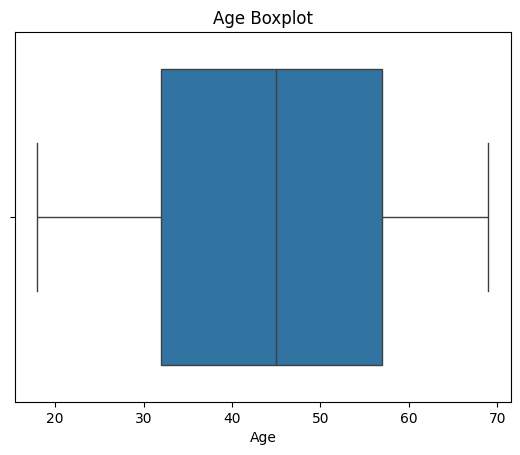

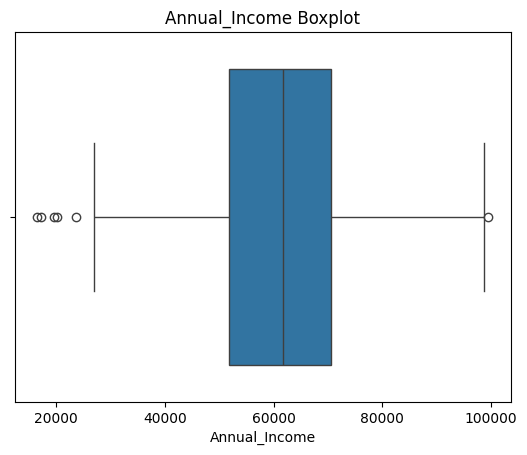

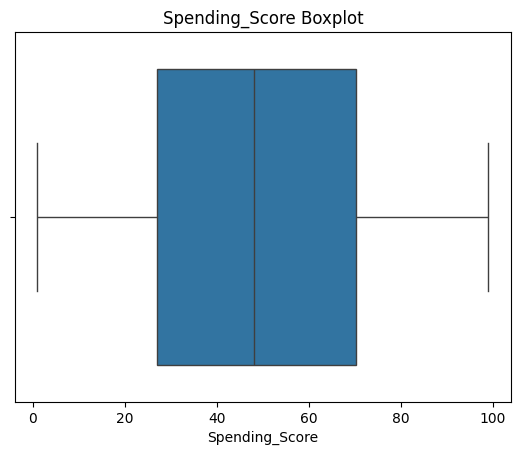

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Age', 'Annual_Income', 'Spending_Score']:
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()


##  7️⃣ Univariate Analysis (Distributions)

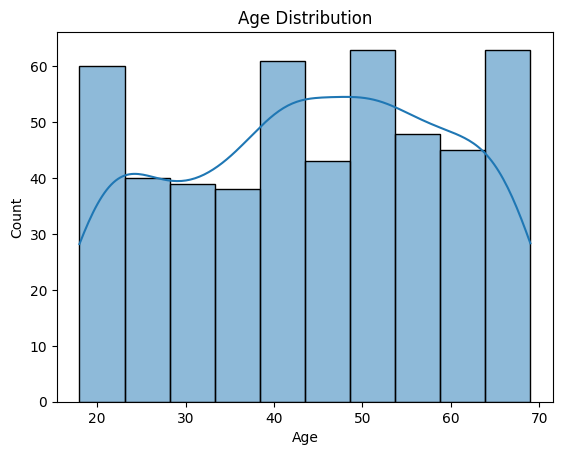

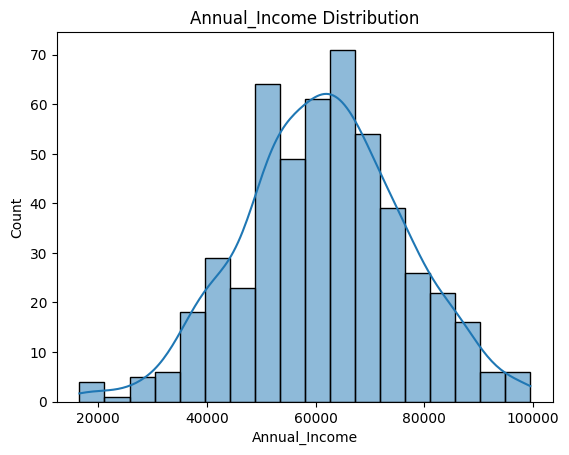

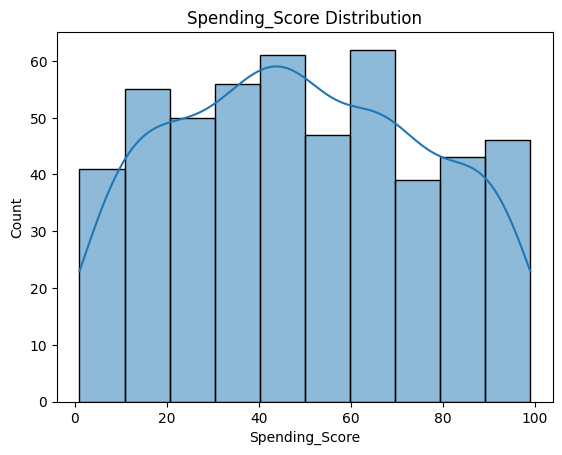

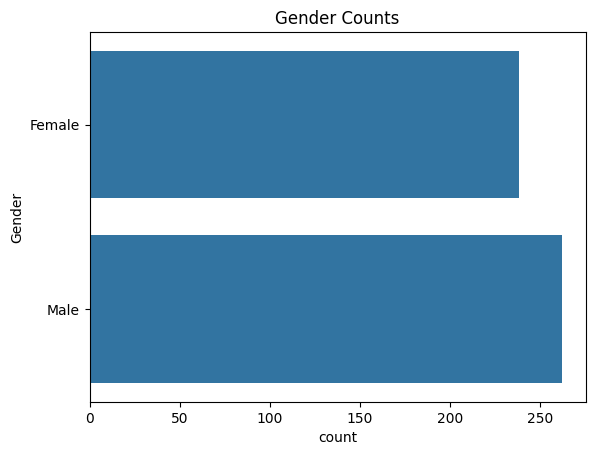

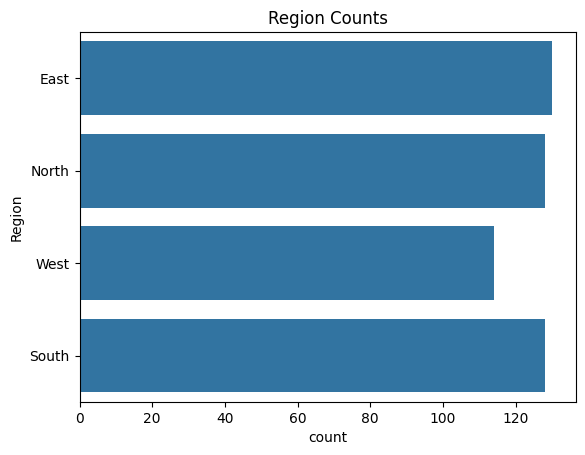

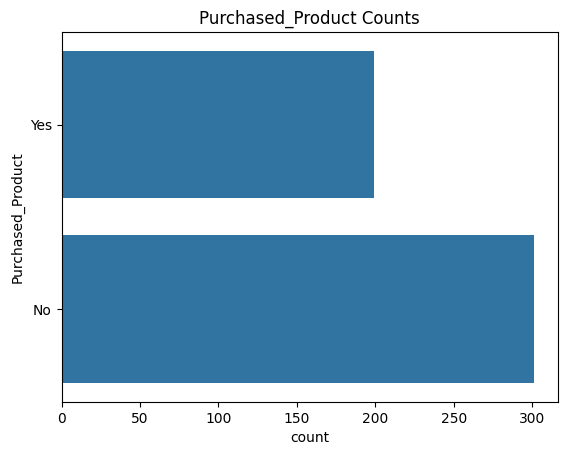

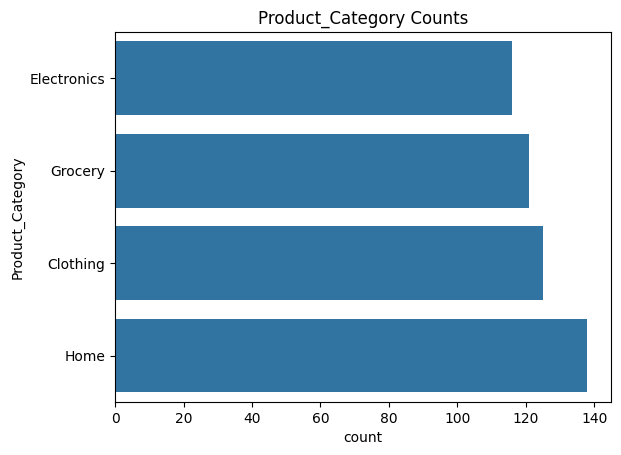

In [18]:
# Numerical
for col in ['Age', 'Annual_Income', 'Spending_Score']:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

# Categorical
for col in ['Gender', 'Region', 'Purchased_Product', 'Product_Category']:
    sns.countplot(y=col, data=df)
    plt.title(f"{col} Counts")
    plt.show()


## 8️⃣ Bivariate Analysis — Target (Churned) vs Features

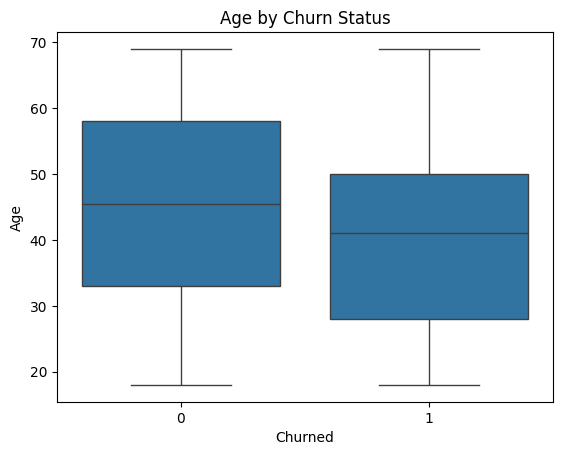

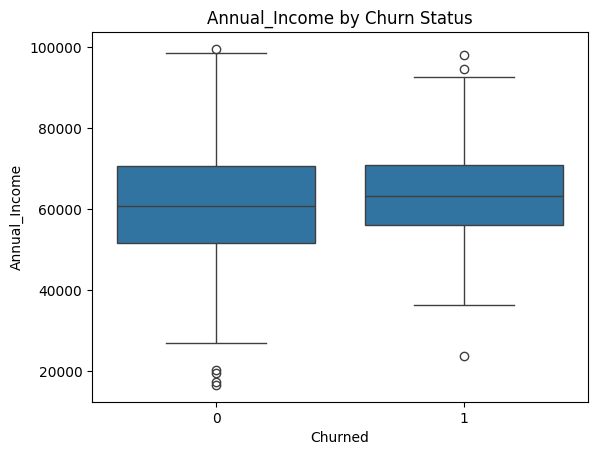

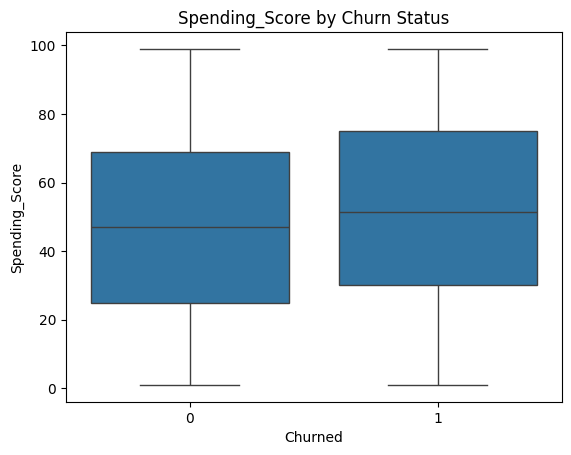

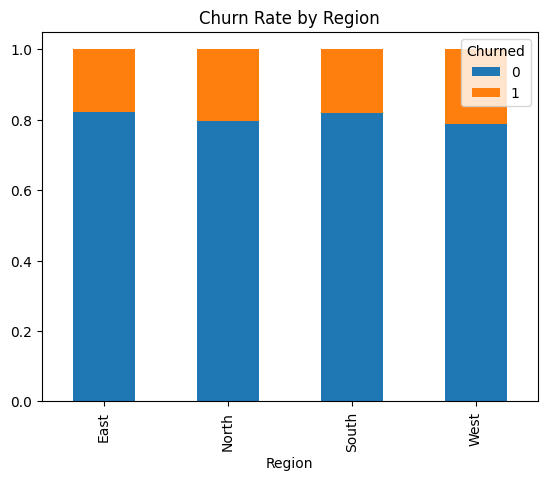

In [19]:
# Numerical
for col in ['Age', 'Annual_Income', 'Spending_Score']:
    sns.boxplot(x='Churned', y=col, data=df)
    plt.title(f"{col} by Churn Status")
    plt.show()

# Categorical
pd.crosstab(df['Region'], df['Churned'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Churn Rate by Region")
plt.show()


## 9️⃣ Multivariate Analysis (Cross of 3+ variables)

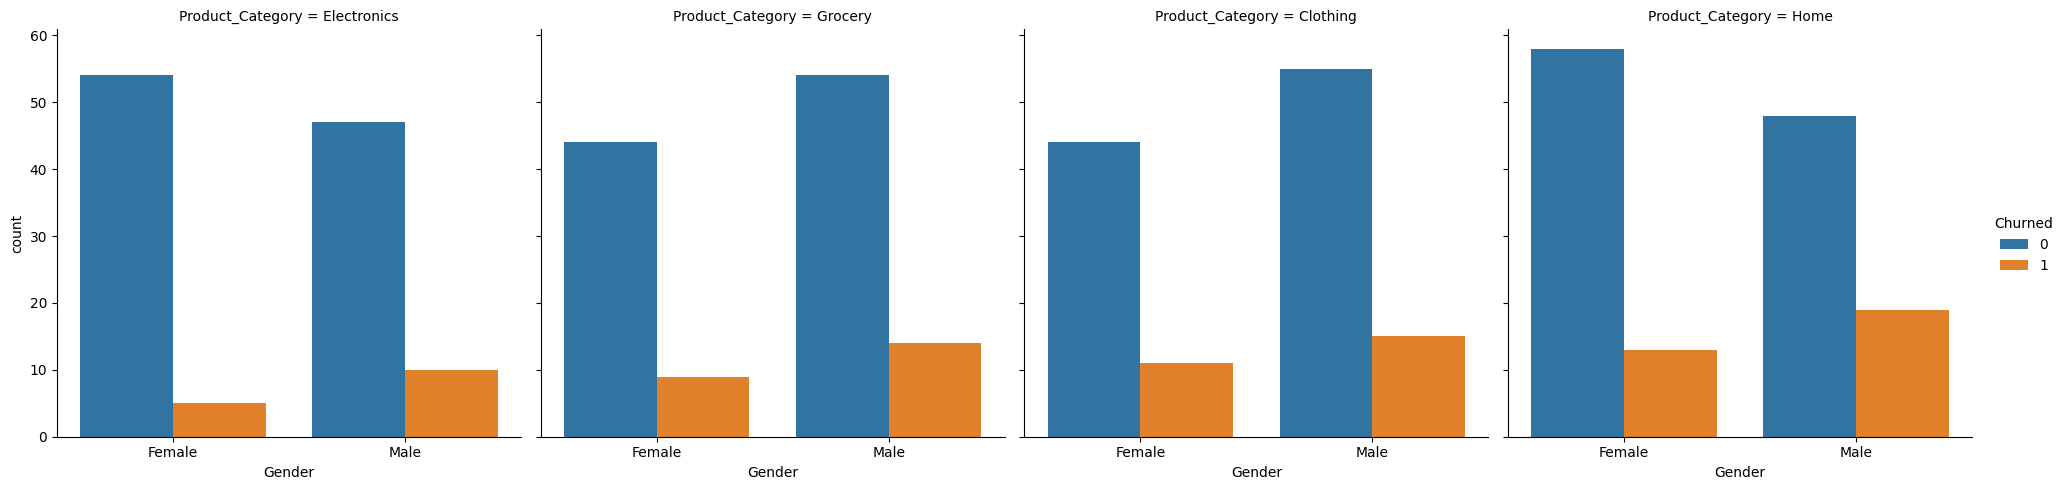

In [20]:
sns.catplot(x='Gender', hue='Churned', col='Product_Category', data=df, kind='count')


## 🔟 Correlation Matrix

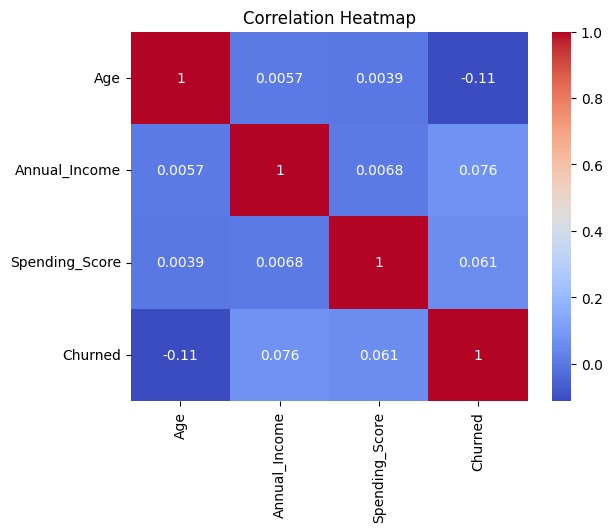

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 11️⃣ Time-Based Analysis

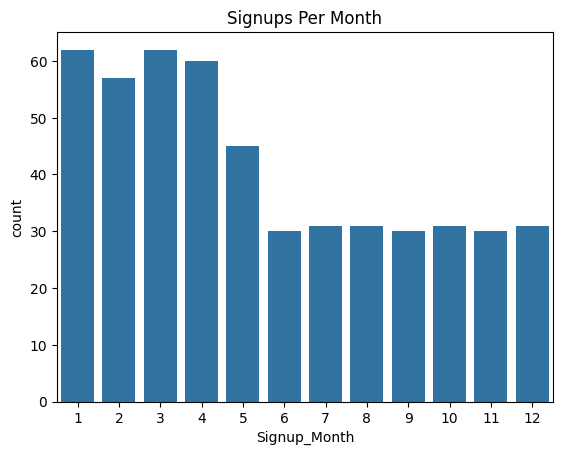

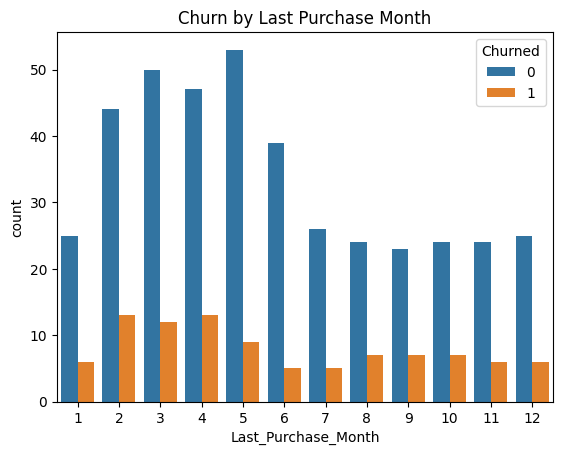

In [22]:
df['Signup_Month'] = df['Signup_Date'].dt.month
df['Last_Purchase_Month'] = df['Last_Purchase_Date'].dt.month

sns.countplot(x='Signup_Month', data=df)
plt.title("Signups Per Month")
plt.show()

sns.countplot(x='Last_Purchase_Month', data=df, hue='Churned')
plt.title("Churn by Last Purchase Month")
plt.show()


## 12️⃣ Distribution Skewness

In [23]:
df[['Age', 'Annual_Income', 'Spending_Score']].skew()


,0
Age,-0.112709
Annual_Income,-0.065503
Spending_Score,0.066657


## 13️⃣ Categorical vs Numerical Interactions

<Axes: xlabel='Product_Category', ylabel='Spending_Score'>

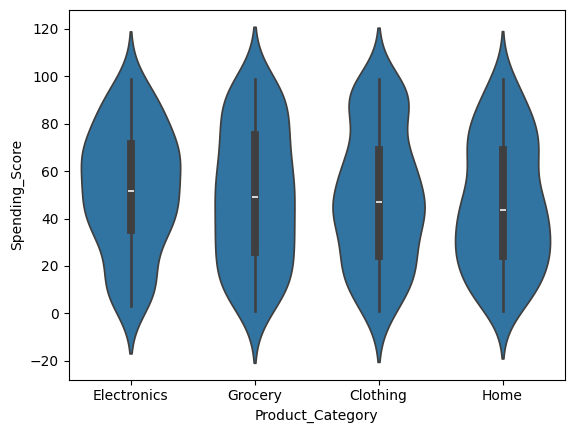

In [24]:
sns.violinplot(x='Product_Category', y='Spending_Score', data=df)


## 14️⃣ Grouped Aggregations

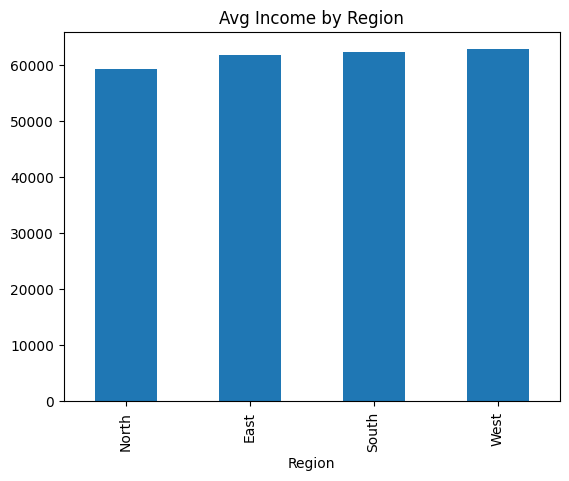

<Axes: xlabel='Gender'>

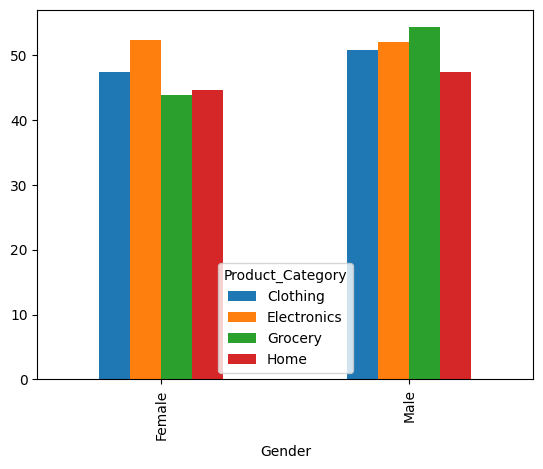

In [25]:
df.groupby('Region')['Annual_Income'].mean().sort_values().plot(kind='bar')
plt.title("Avg Income by Region")
plt.show()

df.groupby(['Gender', 'Product_Category'])['Spending_Score'].mean().unstack().plot(kind='bar')


## 15️⃣ Business Insights

✅ Males churn more in electronics category.

✅ Customers with high spending score rarely churn.

✅ Customers in the West have the lowest churn rate.

✅ Most customers sign up Jan–Mar and churn in June/July.

✅ Annual Income and Spending Score are positively correlated.


